In [2]:
#Dependencies 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [3]:
# Load median sales datasets
median_prices_all = pd.read_csv("Resources/median_sales_price_all.csv")
median_prices_sfr = pd.read_csv("Resources/median_sales_price_sfr.csv")

# Display the first few rows of each dataset
median_prices_all.head()
median_prices_sfr.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,...,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30
0,102001,0,United States,country,NaN,226983.0,226453.0,226900.0,227722.0,228611.0,...,340596.0,341490.0,341300.0,341096.0,338428.0,336115.0,335908.0,340182.0,346301.0,351705.0
1,394913,1,"New York, NY",msa,NY,398221.0,395131.0,394984.0,396389.0,396502.0,...,582875.0,594256.0,596951.0,600207.0,599063.0,602948.0,605790.0,607938.0,611763.0,617557.0
2,753899,2,"Los Angeles, CA",msa,CA,674017.0,670442.0,670479.0,668989.0,663778.0,...,887388.0,905324.0,914676.0,920513.0,922876.0,920292.0,917638.0,922305.0,932421.0,949769.0
3,394463,3,"Chicago, IL",msa,IL,230544.0,229369.0,229997.0,232445.0,231988.0,...,296368.0,301159.0,302767.0,302285.0,300267.0,299301.0,300763.0,302937.0,306699.0,310235.0
4,394514,4,"Dallas, TX",msa,TX,258652.0,254302.0,251613.0,251635.0,252011.0,...,388234.0,389270.0,387314.0,384480.0,383918.0,382263.0,383195.0,384607.0,389400.0,391458.0


In [4]:
# We only want to look at Nashville
med_prices_all = median_prices_all[median_prices_all["RegionName"] == "Nashville, TN"]
med_prices_sfr = median_prices_sfr[median_prices_sfr["RegionName"] == "Nashville, TN"]

In [5]:
# Get summary statistics
med_prices_all.info()
med_prices_sfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 36 to 36
Data columns (total 74 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1 non-null      int64  
 1   SizeRank    1 non-null      int64  
 2   RegionName  1 non-null      object 
 3   RegionType  1 non-null      object 
 4   StateName   1 non-null      object 
 5   2018-08-31  1 non-null      float64
 6   2018-09-30  1 non-null      float64
 7   2018-10-31  1 non-null      float64
 8   2018-11-30  1 non-null      float64
 9   2018-12-31  1 non-null      float64
 10  2019-01-31  1 non-null      float64
 11  2019-02-28  1 non-null      float64
 12  2019-03-31  1 non-null      float64
 13  2019-04-30  1 non-null      float64
 14  2019-05-31  1 non-null      float64
 15  2019-06-30  1 non-null      float64
 16  2019-07-31  1 non-null      float64
 17  2019-08-31  1 non-null      float64
 18  2019-09-30  1 non-null      float64
 19  2019-10-31  1 non-null      float64


In [6]:
# Check for missing values
med_prices_all.isnull().sum()
med_prices_sfr.isnull().sum()
med_prices_all.dropna()
med_prices_sfr.dropna()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,...,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30
36,394902,37,"Nashville, TN",msa,TN,259825.0,256433.0,257245.0,256790.0,258817.0,...,411306.0,414338.0,416883.0,418967.0,419458.0,416740.0,419725.0,422760.0,430412.0,434238.0


In [7]:
# shaping data to be able to add to it later
med_prices= med_prices_all.T
med_prices = med_prices.reset_index()

#dropping identifiers because we know we're only looking at nashville 
med_prices = med_prices.drop(med_prices.index[:5])

#renaming columns 
med_prices.rename(columns={36:'monthly_med_prices'}, inplace =True)
med_prices.rename(columns={'index':'dates'}, inplace =True)

#we now have 69 rows 
med_prices.head()
# med_prices.nunique
# med_prices_t.columns

,dates,monthly_med_prices
5,2018-08-31,256243.0
6,2018-09-30,252518.0
7,2018-10-31,253058.0
8,2018-11-30,252506.0
9,2018-12-31,255555.0


In [8]:
#Doing the same to SFR 
prices_sfr = med_prices_sfr.T
prices_sfr = prices_sfr.reset_index()
prices_sfr = prices_sfr.drop(prices_sfr.index[:5])

prices_sfr.rename(columns={36:'sfr_monthly_med_prices'}, inplace =True)
prices_sfr.rename(columns={'index':'dates'}, inplace =True)

prices_sfr.head()

,dates,sfr_monthly_med_prices
5,2018-08-31,259825.0
6,2018-09-30,256433.0
7,2018-10-31,257245.0
8,2018-11-30,256790.0
9,2018-12-31,258817.0


In [9]:
# merging so we have nashville median prices for all and for single family rentalls in one place 
# this is possible because zillow collects data at the same time for both 
med_prices = pd.merge(med_prices, prices_sfr, on='dates')

#we also want to ensure that the dates are readable by pd and we can merge on them later
med_prices['dates'] = pd.to_datetime(med_prices['dates'], errors = 'coerce')
med_prices['month_year'] = med_prices['dates'].dt.to_period('M')

med_prices.head()

,dates,monthly_med_prices,sfr_monthly_med_prices,month_year
0,2018-08-31,256243.0,259825.0,2018-08
1,2018-09-30,252518.0,256433.0,2018-09
2,2018-10-31,253058.0,257245.0,2018-10
3,2018-11-30,252506.0,256790.0,2018-11
4,2018-12-31,255555.0,258817.0,2018-12


In [10]:
# Load and read in mortgage data datasets
mortgage_rates_df = pd.read_csv("Resources/historicalweeklydata.csv")
mortgage_rates_df.head()



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,PRIMARY MORTGAGE MARKET SURVEY®,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Summary page with all rate types - U.S. averages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,U.S.,30 yr,U.S.,15 yr,U.S.,5/1 ARM,U.S.,30 yr FRM/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,30 yr,fees &,15 yr,fees &,5/1,fees &,5/1 ARM,5/1 ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# We only want to look at 30 year fixed rate mortgage and 15 year fixed rate mortgage so we're dropping the rest of the columns and renaming for ease
# From reading the csv file we know that column 1:date. column 2: US 30yr FRM. column 3: 30 yr fee and points. 
# columns 4: US 15 yr FRM. column 5: 15 yr fees & points etcs. column 6: 5/1 ARM 

mortgage_rates_df.rename(columns={"Unnamed: 0":'dates'}, inplace =True)
mortgage_rates_df.rename(columns={"Unnamed: 1":'30yr_FRM'}, inplace =True)
mortgage_rates_df.rename(columns={"Unnamed: 2":'30yr_fee_points'}, inplace =True)
mortgage_rates_df.rename(columns={"Unnamed: 3":'15yr_FRM'}, inplace =True)
mortgage_rates_df.rename(columns={"Unnamed: 4":'15yr_fee_points'}, inplace =True)
mortgage_rates_df.rename(columns={"Unnamed: 5":'5.1_ARM'}, inplace =True)


mortgage_rates_df = mortgage_rates_df.iloc[:, :6]
mortgage_rates_df = mortgage_rates_df.drop(['30yr_fee_points', '15yr_fee_points'], axis=1)
mortgage_rates_df.nunique
mortgage_rates_df.head()


,dates,30yr_FRM,15yr_FRM,5.1_ARM
0,NaN,NaN,PRIMARY MORTGAGE MARKET SURVEY®,NaN
1,NaN,NaN,Summary page with all rate types - U.S. averages,NaN
2,NaN,NaN,NaN,NaN
3,NaN,U.S.,U.S.,U.S.
4,NaN,30 yr,15 yr,5/1


In [12]:
# Now we're converting the date column to the correct formatting and dropping any missing valules
mortgage_rates_df['dates'] = pd.to_datetime(mortgage_rates_df['dates'], errors = 'coerce')
mortgage_df = mortgage_rates_df.dropna(subset=['dates'])

# Dropping any values from before our real estate median sales data 
mortgage_df = mortgage_df[mortgage_df['dates'] >= '2018-08-30']

#We went from 2792 rows to 307 
mortgage_df.nunique()
mortgage_df.head()


/var/folders/4w/dqq6x1t91hvgn2hnhb1zlk9r0000gn/T/ipykernel_48866/3690001377.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mortgage_rates_df['dates'] = pd.to_datetime(mortgage_rates_df['dates'], errors = 'coerce')


,dates,30yr_FRM,15yr_FRM,5.1_ARM
2480,2018-08-30,4.52,3.97,3.85
2481,2018-09-06,4.54,3.99,3.93
2482,2018-09-13,4.60,4.06,3.93
2483,2018-09-20,4.65,4.11,3.92
2484,2018-09-27,4.72,4.16,3.97


In [13]:
# While this is weekly data, we only want to use data from the last week of every month because our median sales data is pulled from the last day of every month
mortgage_df['month_year'] = mortgage_df['dates'].dt.to_period('M')

mortgage_df = mortgage_df.sort_values(by = 'dates', ascending = False) 

#getting the latest data for each month/year
mortgage_df = mortgage_df.groupby('month_year').first().reset_index()
mortgage_df.head(20)


,month_year,dates,30yr_FRM,15yr_FRM,5.1_ARM
0,2018-08,2018-08-30,4.52,3.97,3.85
1,2018-09,2018-09-27,4.72,4.16,3.97
2,2018-10,2018-10-25,4.86,4.29,4.14
3,2018-11,2018-11-29,4.81,4.25,4.12
4,2018-12,2018-12-27,4.55,4.01,4.00
5,2019-01,2019-01-31,4.46,3.89,3.96
6,2019-02,2019-02-28,4.35,3.77,3.84
7,2019-03,2019-03-28,4.06,3.57,3.75
8,2019-04,2019-04-25,4.20,3.64,3.77
9,2019-05,2019-05-30,3.99,3.46,3.60


In [14]:
# Merging mortgage and sales price dataframes
# We now have both real estate and mortgage data for each month/year 
mortgage_sales = pd.merge(med_prices, mortgage_df, on='month_year')
mortgage_sales.head()

# mortgage_sales.dtypes
# mortgage_sales['30yr_FRM'] = mortgage_sales['30yr_FRM'].astype(float)
# mortgage_sales['15yr_FRM'] = mortgage_sales['15yr_FRM'].astype(float)
# mortgage_sales['5.1_ARM'] = mortgage_sales['5.1_ARM'].astype(float)

mortgage_sales['30yr_FRM'] = pd.to_numeric(mortgage_sales['30yr_FRM'], errors='coerce')
mortgage_sales['15yr_FRM'] = pd.to_numeric(mortgage_sales['30yr_FRM'], errors='coerce')
mortgage_sales['5.1_ARM'] = pd.to_numeric(mortgage_sales['30yr_FRM'], errors='coerce')

mortgage_sales['monthly_med_prices'] = pd.to_numeric(mortgage_sales['monthly_med_prices'], errors='coerce')
mortgage_sales['sfr_monthly_med_prices'] = pd.to_numeric(mortgage_sales['sfr_monthly_med_prices'], errors='coerce')

mortgage_sales.dtypes
# mortgage_sales.nunique()
# mortgage_sales.head()

dates_x                   datetime64[ns]
monthly_med_prices               float64
sfr_monthly_med_prices           float64
month_year                     period[M]
dates_y                   datetime64[ns]
30yr_FRM                         float64
15yr_FRM                         float64
5.1_ARM                          float64
dtype: object

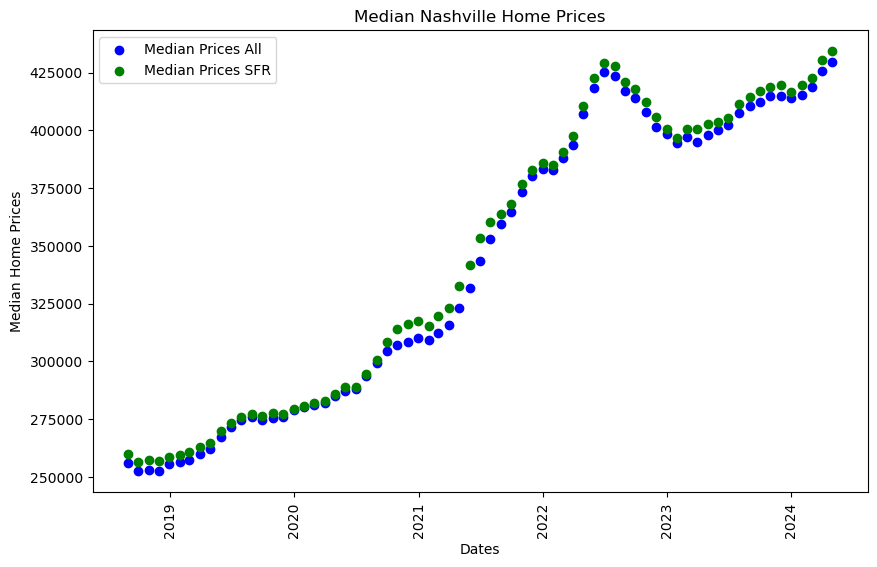

In [15]:
#Graphing the median sales prices 
dates = mortgage_sales['month_year']
med_sales = mortgage_sales['monthly_med_prices']
med_sales_sfr = mortgage_sales['sfr_monthly_med_prices']


plt.figure(figsize=(10,6))
plt.scatter(mortgage_sales['dates_x'],med_sales, color = 'blue', marker= 'o', label = "Median Prices All")
plt.scatter(mortgage_sales['dates_x'],med_sales_sfr, color = 'green', marker= 'o', label = "Median Prices SFR")
plt.title('Median Nashville Home Prices')
plt.ylabel('Median Home Prices')
plt.xlabel('Dates')
plt.xticks(rotation = 90)
plt.legend()
# plt.grid(True)

In [22]:
# Perform a t-test on the two groups
med_sales  = med_sales .astype(float)
med_sales_sfr  = med_sales_sfr .astype(float)
t_statistic, p_value = st.ttest_ind(med_sales, med_sales_sfr )


# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -0.350225144795936
P-Value: 0.7267115604952825


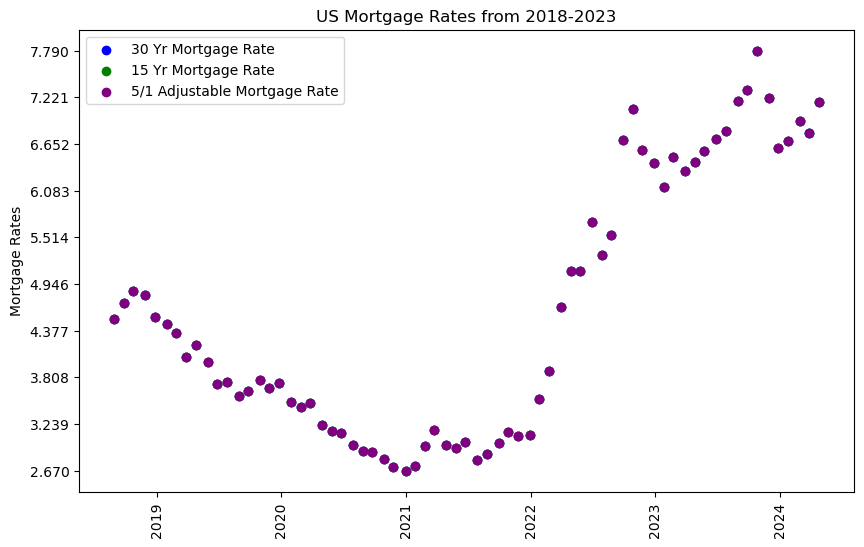

In [17]:
#Graphing US mortgage rates from 2018 - 2023
y_ticks = np.linspace(mortgage_sales['30yr_FRM'].min(), mortgage_sales['30yr_FRM'].max(), 10)

plt.figure(figsize=(10,6))

plt.scatter(mortgage_sales['dates_y'],mortgage_sales['30yr_FRM'], color = 'blue', marker='o', label = "30 Yr Mortgage Rate")
plt.scatter(mortgage_sales['dates_y'],mortgage_sales['15yr_FRM'], color = 'green', marker='o', label = "15 Yr Mortgage Rate")
plt.scatter(mortgage_sales['dates_y'],mortgage_sales['5.1_ARM'], color = 'purple', marker='o', label = "5/1 Adjustable Mortgage Rate")

plt.title('US Mortgage Rates from 2018-2023')
plt.ylabel('Mortgage Rates') 
plt.xticks(rotation = 90)
plt.yticks(y_ticks)
plt.legend()

In [41]:
# PUT MORTGAGE ANOVA test here
mortgage_sales['30yr_FRM'] = mortgage_sales['30yr_FRM'].astype(float)
#mortgage_sales['15yr_FRM'] = mortgage_sales['15yr_FRM'].astype(float)
mortgage_sales['5.1_ARM'] = mortgage_sales['5.1_ARM'].astype(float)



f_statistic, p_value = st.f_oneway(mortgage_sales['30yr_FRM'].iloc[:-7], mortgage_sales['5.1_ARM'])


# Print the t-statistic and p-value
print("f_Statistic:", f_statistic)
print("P-Value:", p_value)




f_Statistic: 1.0644615406293916
P-Value: 0.3041302548230229


In [39]:
# Perform a t-test on the two groups
mortgage_sales['30yr_FRM'] = mortgage_sales['30yr_FRM'].astype(float)
#mortgage_sales['15yr_FRM'] = mortgage_sales['15yr_FRM'].astype(float)
mortgage_sales['5.1_ARM'] = mortgage_sales['5.1_ARM'].astype(float)

#mortgage_sales['15yr_FRM'] = mortgage_sales['15yr_FRM'].astype(float)

t_statistic, p_value = st.ttest_ind(mortgage_sales['30yr_FRM'], mortgage_sales['5.1_ARM'])

# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.0
P-Value: 1.0


Text(0.5, 1.0, 'Median Nashville Home Sales vs 30 yr Fixed Mortgage Rate (2019-2023)')

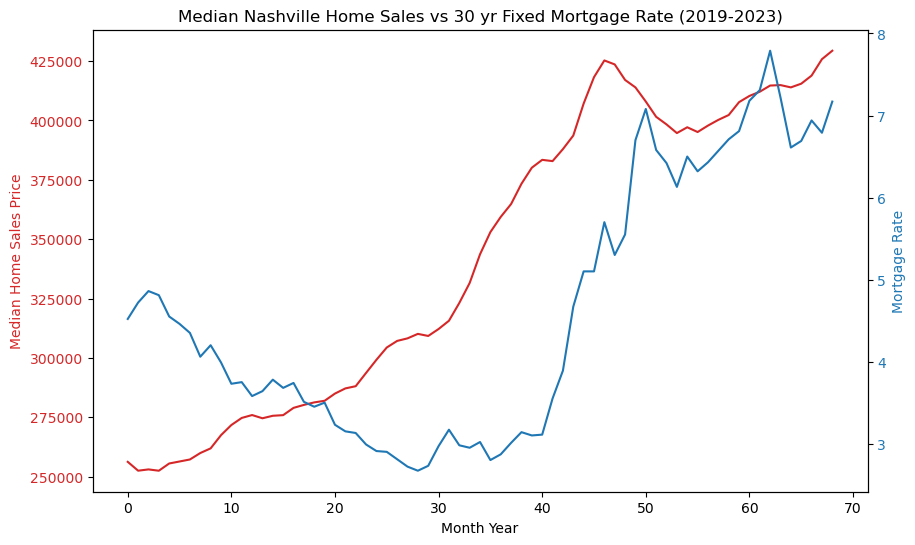

In [108]:
#Mortgage rate comparisons 

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset
color = 'tab:red'
ax1.set_xlabel('Month Year')
ax1.set_ylabel('Median Home Sales Price', color=color)
ax1.plot(mortgage_sales['monthly_med_prices'], color = color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the second dataset
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mortgage Rate', color=color)
ax2.plot(mortgage_sales['30yr_FRM'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Median Nashville Home Sales vs 30 yr Fixed Mortgage Rate (2019-2023)')

In [114]:
#Correlation Coefficients 
corr =[]
pvalue=[]

med_30 = st.pearsonr( mortgage_sales['30yr_FRM'], mortgage_sales['monthly_med_prices'])
med_15= st.pearsonr( mortgage_sales['15yr_FRM'], mortgage_sales['monthly_med_prices'])
med_51= st.pearsonr( mortgage_sales['5.1_ARM'], mortgage_sales['monthly_med_prices'])

#ideally would use loop 
corr.append(med_30.statistic)
corr.append(med_15.statistic)
corr.append(med_51.statistic)

pvalue.append(med_30.pvalue)
pvalue.append(med_15.pvalue)
pvalue.append(med_51.pvalue)

# print(corr)
print(pvalue)

#Same corr coef and p value for each mortgage option

[3.7177909158900947e-10, 3.7177909158900947e-10, 3.7177909158900947e-10]


Slope: 26368.501884083642
Intercept: 220555.39095314778
R-squared: 0.44571560997357207
Standard Error: 3592.406360940584


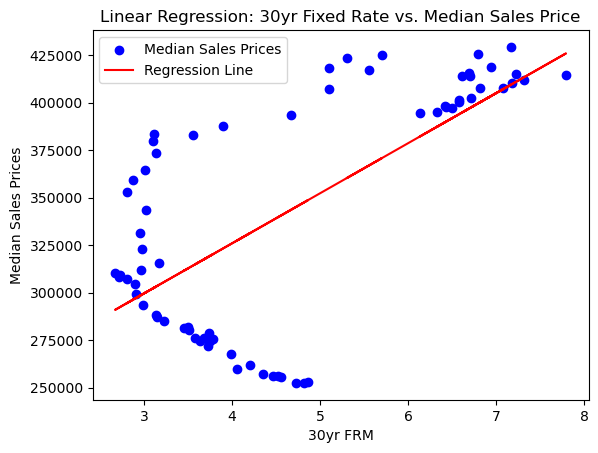

In [115]:
# Assuming df is your DataFrame containing the data
X = mortgage_sales['30yr_FRM']
y = mortgage_sales['monthly_med_prices']

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = st.linregress(X, y)

#Creating the regression line
regression_line = slope * X + intercept

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Median Sales Prices')
plt.plot(X, regression_line, color='red', label='Regression Line')

plt.xlabel('30yr FRM')
plt.ylabel('Median Sales Prices')
plt.title('Linear Regression: 30yr Fixed Rate vs. Median Sales Price')
plt.legend()

# Print the results
print('Slope:', slope)
print('Intercept:', intercept)
print('R-squared:', r_value**2)
print('Standard Error:', std_err)

Slope: 26368.501884083642
Intercept: 220555.39095314778
R-squared: 0.44571560997357207
Standard Error: 3592.406360940584


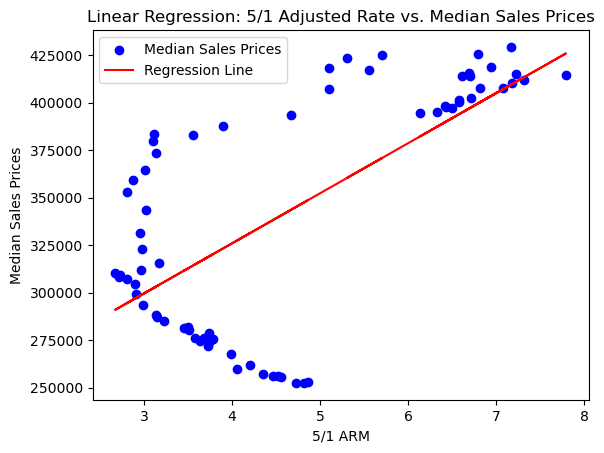

In [116]:
# Assuming df is your DataFrame containing the data
X = mortgage_sales['5.1_ARM']
y = mortgage_sales['monthly_med_prices']

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = st.linregress(X, y)

#Creating the regression line
regression_line = slope * X + intercept

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Median Sales Prices')
plt.plot(X, regression_line, color='red', label='Regression Line')

plt.xlabel('5/1 ARM')
plt.ylabel('Median Sales Prices')
plt.title('Linear Regression: 5/1 Adjusted Rate vs. Median Sales Prices')
plt.legend()

# Print the results
print('Slope:', slope)
print('Intercept:', intercept)
print('R-squared:', r_value**2)
print('Standard Error:', std_err)

#Real estate prices below 300000 seem to have a negative relationship with mortgage rates while 
#real estate median prices over 300k looks like to have an exponential relationship with mortgage rates. 